In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data directories
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'

image_size = (256, 256)
batch_size = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    rotation_range=30,       
    width_shift_range=0.2,    
    height_shift_range=0.2,  
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,
    fill_mode='nearest'       
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

# Creating data generators
train_batches = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle training data
)

val_batches = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle validation data
)

test_batches = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle test data
)

# Converting to tf.data.Dataset and using `.repeat()`
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, train_batches.num_classes])
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, val_batches.num_classes])
).repeat()

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, test_batches.num_classes])
)

# Load pre-trained InceptionV3 model
inception = tf.keras.applications.InceptionV3(include_top=False, input_shape=(*image_size, 3), pooling='avg')
inception.trainable = False  # Freeze the InceptionV3 layers

# Build the model
model = tf.keras.Sequential([
    inception,
    keras.layers.Dense(128,activation='relu'), 
    keras.layers.Dropout(0.5),   
    keras.layers.Dense(64,activation='relu'),   
    keras.layers.Dense(7, activation='softmax')
   
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
steps_per_epoch = train_batches.samples // batch_size
validation_steps = val_batches.samples // batch_size

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,073,767 (84.20 MB)

 Trainable params: 270,983 (1.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2299 - loss: 1.9957 - val_accuracy: 0.4062 - val_loss: 1.5494
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.3549 - loss: 1.6101 - val_accuracy: 0.4960 - val_loss: 1.3592
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.4084 - loss: 1.5107 - val_accuracy: 0.5251 - val_loss: 1.2815
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.4453 - loss: 1.4118 - val_accuracy: 0.5392 - val_loss: 1.1768
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4692 - loss: 1.3619 - val_accuracy: 0.6034 - val_loss: 1.0975
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.5061 - loss: 1.3017 - val_accuracy: 0.5753 - val_loss: 1.1414
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.4855 - loss: 1.2855 - val_accuracy: 0.6486 - val_loss: 0.9876
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.5075 - loss: 1.2489 - val_accuracy: 0.5873 - v

In [3]:
##apply different layers
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6172 - loss: 1.0283 - val_accuracy: 0.7249 - val_loss: 0.7429
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6157 - loss: 1.0177 - val_accuracy: 0.7410 - val_loss: 0.7164
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.6493 - loss: 0.9951 - val_accuracy: 0.7440 - val_loss: 0.7160
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.6330 - loss: 0.9971 - val_accuracy: 0.7329 - val_loss: 0.7251
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6332 - loss: 0.9974 - val_accuracy: 0.7620 - val_loss: 0.6735
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6424 - loss: 1.0053 - val_accuracy: 0.7681 - val_loss: 0.6659
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6398 - loss: 1.0045 - val_accuracy: 0.7520 - val_loss: 0.7009
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6416 - loss: 0.9627 - val_accuracy: 0.7651 - v

In [8]:
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.5584 - loss: 1.1348 - val_accuracy: 0.6747 - val_loss: 0.9436
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.5366 - loss: 1.1731 - val_accuracy: 0.6637 - val_loss: 0.9055
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5821 - loss: 1.1149 - val_accuracy: 0.6878 - val_loss: 0.8487
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.5874 - loss: 1.0609 - val_accuracy: 0.7078 - val_loss: 0.8087
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.5816 - loss: 1.0798 - val_accuracy: 0.7189 - val_loss: 0.8389
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5835 - loss: 1.0421 - val_accuracy: 0.7400 - val_loss: 0.7925
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6054 - loss: 1.0260 - val_accuracy: 0.7219 - val_loss: 0.7565
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6015 - loss: 1.0478 - val_accuracy: 0.7219 - v

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data directories
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'

image_size = (299, 299)
batch_size = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    rotation_range=30,       
    width_shift_range=0.2,    
    height_shift_range=0.2,  
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,
    fill_mode='nearest'       
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

# Creating data generators
train_batches = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle training data
)

val_batches = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle validation data
)

test_batches = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle test data
)

# Converting to tf.data.Dataset and using `.repeat()`
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, train_batches.num_classes])
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, val_batches.num_classes])
).repeat()

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, test_batches.num_classes])
)

# Load pre-trained InceptionV3 model
inception = tf.keras.applications.InceptionV3(include_top=False, input_shape=(*image_size, 3), pooling='avg')
inception.trainable = False  # Freeze the InceptionV3 layers

# Build the model
model = tf.keras.Sequential([
    inception,
    keras.layers.Dense(128,activation='relu'), 
    keras.layers.Dropout(0.5),   
    keras.layers.Dense(64,activation='relu'),   
    keras.layers.Dense(7, activation='softmax')
   
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
steps_per_epoch = train_batches.samples // batch_size
validation_steps = val_batches.samples // batch_size

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,073,767 (84.20 MB)

 Trainable params: 270,983 (1.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.2602 - loss: 1.8901 - val_accuracy: 0.4971 - val_loss: 1.4034
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.4073 - loss: 1.4961 - val_accuracy: 0.5311 - val_loss: 1.2262
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.4585 - loss: 1.3763 - val_accuracy: 0.5693 - val_loss: 1.1918
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.5191 - loss: 1.2356 - val_accuracy: 0.6426 - val_loss: 1.0529
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.5392 - loss: 1.2122 - val_accuracy: 0.6687 - val_loss: 0.9463
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.5495 - loss: 1.1800 - val_accuracy: 0.6466 - val_loss: 1.0002
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.5631 - loss: 1.1240 - val_accuracy: 0.7008 - val_loss: 0.8926
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5932 - loss: 1.0763 - val_accuracy: 0.7048 - v

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data directories
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'

image_size = (299, 299)
batch_size = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    rotation_range=30,       
    width_shift_range=0.2,    
    height_shift_range=0.2,  
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,
    fill_mode='nearest'       
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

# Creating data generators
train_batches = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle training data
)

val_batches = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle validation data
)

test_batches = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle test data
)

# Converting to tf.data.Dataset and using `.repeat()`
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, train_batches.num_classes])
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, val_batches.num_classes])
).repeat()

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *image_size, 3], [None, test_batches.num_classes])
)

# Load pre-trained InceptionV3 model
inception = tf.keras.applications.InceptionV3(include_top=False, input_shape=(*image_size, 3), pooling='avg')
inception.trainable = False  # Freeze the InceptionV3 layers

# Build the model
model = tf.keras.Sequential([
    inception,
    keras.layers.Dense(128,activation='relu'), 
    keras.layers.Dropout(0.5),   
    keras.layers.Dense(64,activation='relu'),   
    keras.layers.Dense(7, activation='softmax')
   
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
steps_per_epoch = train_batches.samples // batch_size
validation_steps = val_batches.samples // batch_size

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,073,767 (84.20 MB)

 Trainable params: 270,983 (1.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.2577 - loss: 1.9015 - val_accuracy: 0.4990 - val_loss: 1.4138
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.4089 - loss: 1.5110 - val_accuracy: 0.5572 - val_loss: 1.2194
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.4445 - loss: 1.4233 - val_accuracy: 0.5522 - val_loss: 1.1554
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.4828 - loss: 1.3319 - val_accuracy: 0.6245 - val_loss: 1.0144
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5176 - loss: 1.2545 - val_accuracy: 0.6426 - val_loss: 0.9598
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.5244 - loss: 1.2042 - val_accuracy: 0.6677 - val_loss: 0.9370
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.5739 - loss: 1.1231 - val_accuracy: 0.6888 - val_loss: 0.8728
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5719 - loss: 1.0972 - val_accuracy: 0.7219 - v

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data directories
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'

image_size = (299, 299)
batch_size = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    rotation_range=30,       
    width_shift_range=0.2,    
    height_shift_range=0.2,  
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,
    fill_mode='nearest'       
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

# Creating data generators
train_batches = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle training data
)

val_batches = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle validation data
)

test_batches = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle test data
)

# Get the number of samples
print(f"Number of training samples: {train_batches.n}")
print(f"Number of validation samples: {val_batches.n}")
print(f"Number of test samples: {test_batches.n}")

# Load pre-trained InceptionV3 without the top layer
inception_base = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False, 
    input_shape=(299, 299, 3)  
)

# Freeze all layers initially
for layer in inception_base.layers:
    layer.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    inception_base,
    keras.layers.GlobalAveragePooling2D(),  # Replace flatten with global pooling for better generalization
    keras.layers.Dense(256, activation='relu'),  # Optional dense layer
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(7, activation='softmax')  # 7 output classes
])

# Unfreeze the last 30 layers of the base InceptionV3 model
for layer in model.layers[0].layers[-30:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to confirm trainable layers
model.summary()


history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10
)

# Save the model for future use
model.save('inceptionv3_teeth_model_finetuned.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.2f}")


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Number of training samples: 3087
Number of validation samples: 1028
Number of test samples: 1028


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,329,127 (85.18 MB)

 Trainable params: 5,682,375 (21.68 MB)

 Non-trainable params: 16,646,752 (63.50 MB)

C:\Users\elbostan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1955 - loss: 1.9852

C:\Users\elbostan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.1961 - loss: 1.9843 - val_accuracy: 0.4407 - val_loss: 1.6347
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.3511 - loss: 1.6749 - val_accuracy: 0.5175 - val_loss: 1.4279
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.4405 - loss: 1.5243 - val_accuracy: 0.5798 - val_loss: 1.2893
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.5114 - loss: 1.3425 - val_accuracy: 0.6245 - val_loss: 1.1721
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5649 - loss: 1.2406 - val_accuracy: 0.6566 - val_loss: 1.0735
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.5907 - loss: 1.1782 - val_accuracy: 0.6868 - val_loss: 0.9925
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.6132 - loss: 1.0954 - val_accuracy: 0.7286 - val_loss: 0.9220
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.6299 - loss: 1.0343 - val_accuracy: 0.7432 - val_loss: 0.

33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8490 - loss: 0.5334
Test Accuracy: 0.78


In [4]:
# Add custom classification head
model = tf.keras.Sequential([
    inception_base,
    keras.layers.GlobalAveragePooling2D(),  # Replace flatten with global pooling for better generalization
    keras.layers.Dense(256, activation='relu'),  # Optional dense layer
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(7, activation='softmax')  # 7 output classes
])

# Unfreeze 
for layer in model.layers[0].layers[-30:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to confirm trainable layers
model.summary()


history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=20
)

# Save the model for future use
model.save('inceptionv3_teeth_model_finetuned.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.2f}")



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,329,127 (85.18 MB)

 Trainable params: 5,682,375 (21.68 MB)

 Non-trainable params: 16,646,752 (63.50 MB)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.1832 - loss: 2.0027 - val_accuracy: 0.4591 - val_loss: 1.5204
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.4241 - loss: 1.5670 - val_accuracy: 0.5418 - val_loss: 1.2899
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.5024 - loss: 1.3692 - val_accuracy: 0.6226 - val_loss: 1.1391
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5418 - loss: 1.2523 - val_accuracy: 0.6654 - val_loss: 1.0285
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.5968 - loss: 1.1379 - val_accuracy: 0.6907 - val_loss: 0.9426
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.6266 - loss: 1.0964 - val_accuracy: 0.7247 - val_loss: 0.8768
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.6311 - loss: 1.0118 - val_accuracy: 0.7471 - val_loss: 0.8132
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.6618 - loss: 0.9474 - val_accuracy: 0.7685 - v

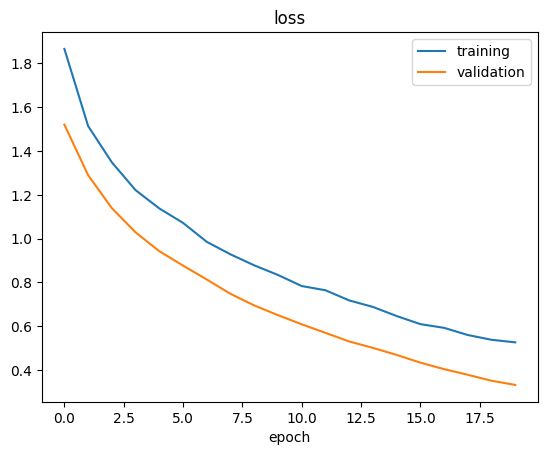

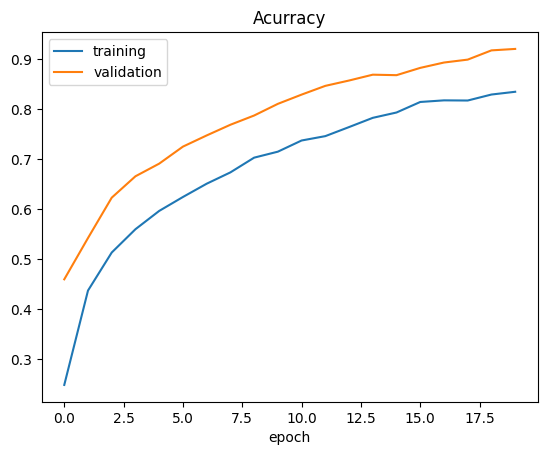

In [5]:
###visualizing Model Results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
## plot Training and validation accuracy )
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()